**Mount drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Initial setup and data loading**

In [2]:
#Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore")

#Load the dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/diabetes_database.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'diabetes.csv' not found. Please upload the file or adjust the path.")

    data = {
       "Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"
    }
    df = pd.DataFrame(data)

#Display the first few rows and check for missing values
print("\n--- Initial Data Check ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

#Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#Standardize the data (crucial for PCA and helpful for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dataset loaded successfully.

--- Initial Data Check ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnanc

**EDA visualizations**

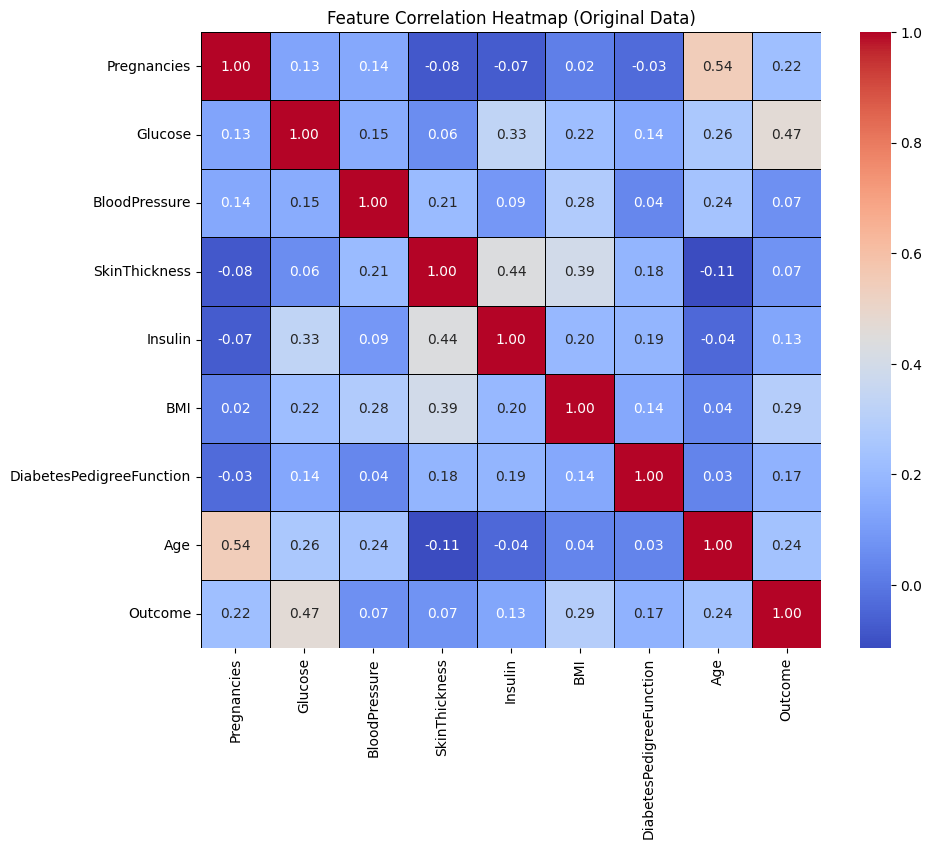


--- Pair Plot of Key Features ---


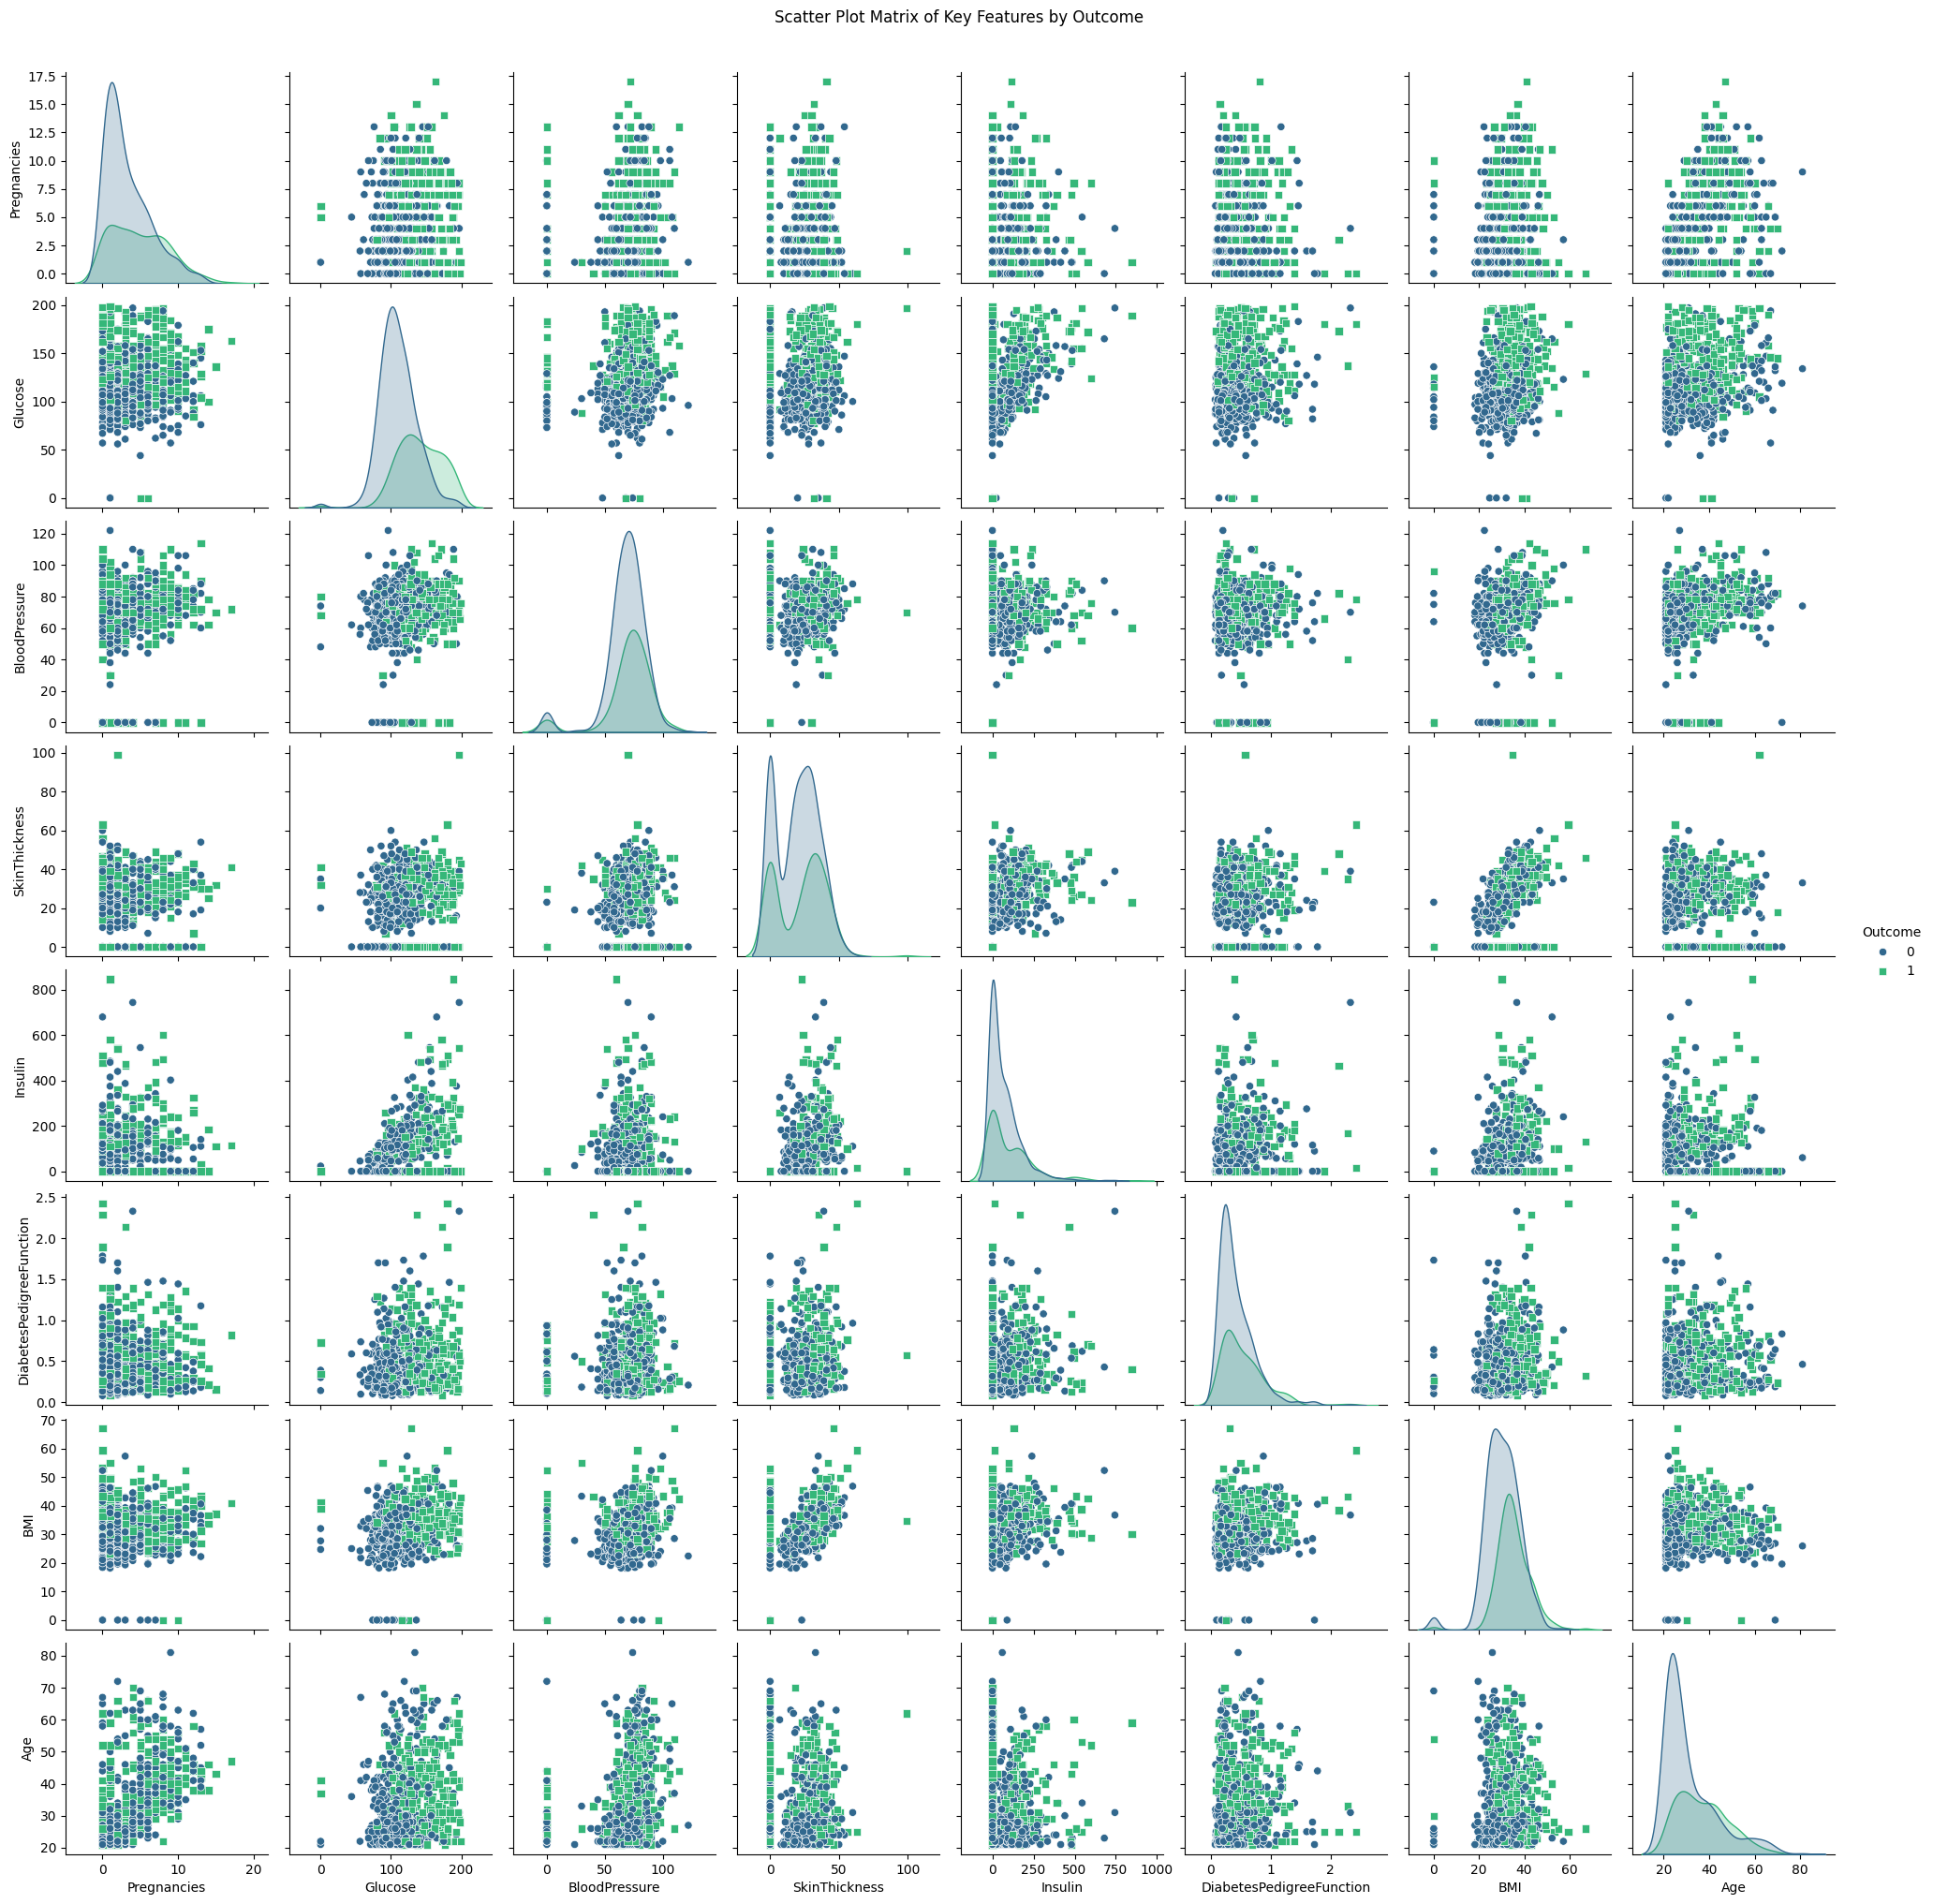

In [3]:
#Heatmap of Features
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Feature Correlation Heatmap (Original Data)')
plt.show()

#Pair Plot (Scatter Plot of Features)
print("\n--- Pair Plot of Key Features ---")
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI', 'Age', 'Outcome', ]
sns.pairplot(df[cols], hue='Outcome', palette='viridis', markers=["o", "s"])
plt.suptitle('Scatter Plot Matrix of Key Features by Outcome', y=1.02)
plt.show()

**Standard logistic regression**

In [28]:
# Standard Logistic Regression
lr_full = LogisticRegression(random_state=42)
lr_full.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_full = lr_full.predict(X_train_scaled)

# Predict on the test set
y_test_pred_full = lr_full.predict(X_test_scaled)
y_prob_full = lr_full.predict_proba(X_test_scaled)[:, 1] # Probability of class 1

print("\n=== Standard Logistic Regression Results (Full Features) ===")

# Training Set Metrics
print("\n--- A. Training Set Performance ---")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_full):.4f}")
print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_full))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_full))

# Testing Set Metrics (Generalization)
print("\n--- B. Testing Set Performance ---")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_full):.4f}")
print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_full))
print("\nTesting Classification Report (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_test_pred_full))


=== Standard Logistic Regression Results (Full Features) ===

--- A. Training Set Performance ---
Training Accuracy: 0.7877

Training Confusion Matrix:
[[313  37]
 [ 77 110]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       350
           1       0.75      0.59      0.66       187

    accuracy                           0.79       537
   macro avg       0.78      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537


--- B. Testing Set Performance ---
Testing Accuracy: 0.7446

Testing Confusion Matrix:
[[130  20]
 [ 39  42]]

Testing Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       

**PCA and logistic regression**

In [29]:
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Logistic Regression on the 2 PC features
lr_pca = LogisticRegression(random_state=42)
lr_pca.fit(X_train_pca, y_train)

# Check explained variance (retained from original code)
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = sum(explained_variance_ratio)
print(f"\n--- PCA Analysis ---")
print(f"Total variance explained by {n_components} components: {total_variance_explained:.4f}")

# Predict on the training set
y_train_pred_pca = lr_pca.predict(X_train_pca)

# Predict on the test set
y_test_pred_pca = lr_pca.predict(X_test_pca)
y_prob_pca = lr_pca.predict_proba(X_test_pca)[:, 1] # Probability of class 1

print("\n=== Logistic Regression Results (2 PCA Components) ===")

# Training Set Metrics
print("\n--- A. Training Set Performance ---")
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_pca):.4f}")
print("\nTraining Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_pca))
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_pca))

# Testing Set Metrics (Generalization)8
print("\n--- B. Testing Set Performance ---")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_pca):.4f}")
print("\nTesting Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_pca))
print("\nTesting Classification Report (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_test_pred_pca))


--- PCA Analysis ---
Total variance explained by 2 components: 0.4750

=== Logistic Regression Results (2 PCA Components) ===

--- A. Training Set Performance ---
Training Accuracy: 0.7207

Training Confusion Matrix:
[[300  50]
 [100  87]]

Training Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       350
           1       0.64      0.47      0.54       187

    accuracy                           0.72       537
   macro avg       0.69      0.66      0.67       537
weighted avg       0.71      0.72      0.71       537


--- B. Testing Set Performance ---
Testing Accuracy: 0.7186

Testing Confusion Matrix:
[[130  20]
 [ 45  36]]

Testing Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       150
           1       0.64      0.44      0.53        81

    accuracy                           0.72       231
   macro

**PCA visualization**

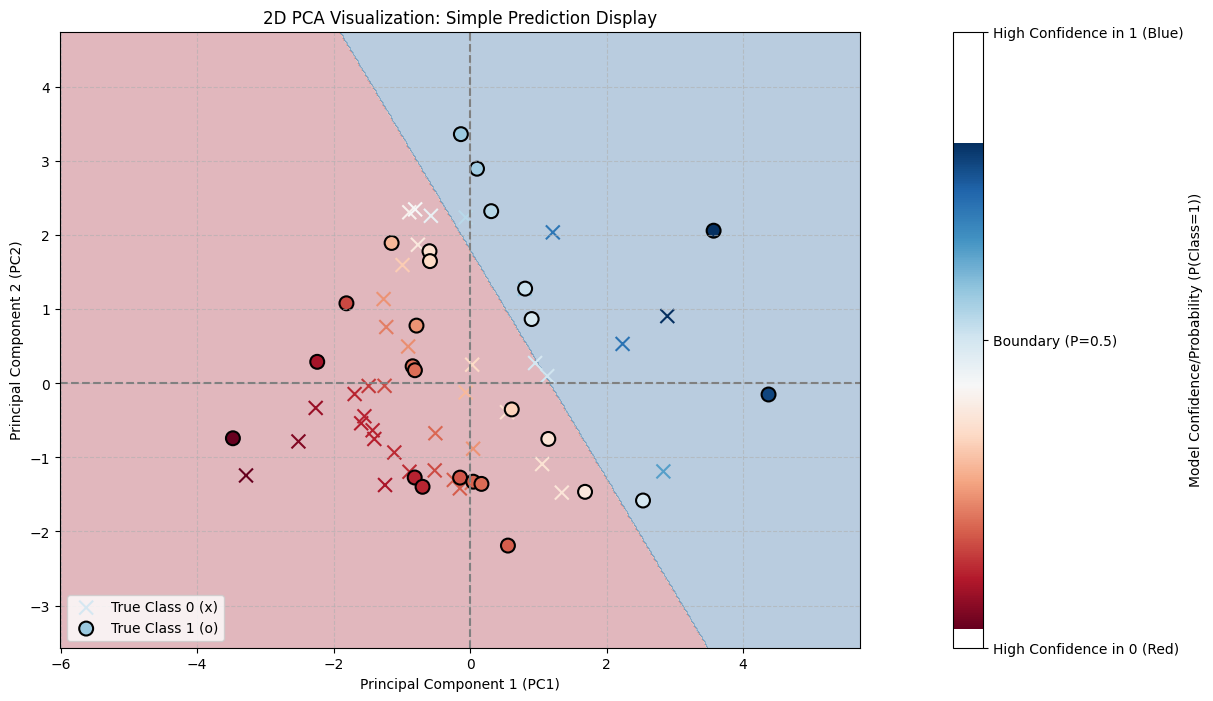

In [24]:
#SIMPLEST 2D PCA Visualization (No Error Highlighting)
markers = {0: "x", 1: "o"}
s_correct = 100

plt.figure(figsize=(12, 8))

#Plot the Decision Boundary
h = .02
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lr_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)


#Plot ALL Test Samples with standard black borders
scatter_main_handles = []

for true_class in [0, 1]:
    subset = pca_df_test[pca_df_test['True_Outcome'] == true_class]

    #Plotting ALL points with a single, uniform black border ('k')
    handle = plt.scatter(subset['PC1'], subset['PC2'],
                         c=subset['Probability_Class_1'],
                         cmap='RdBu',
                         s=s_correct,
                         marker=markers[true_class],
                         edgecolor='k',
                         linewidths=1.5,
                         label=f'True Class {true_class} ({markers[true_class]})')
    scatter_main_handles.append(handle)

#Adding Color Bar and Legend
plt.legend(loc='lower left')
cbar_main = plt.colorbar(scatter_main_handles[0], ax=plt.gca(), orientation='vertical', pad=0.1, fraction=0.04)
cbar_main.set_label('Model Confidence/Probability (P(Class=1))')
cbar_main.set_ticks([0, 0.5, 1])
cbar_main.set_ticklabels(['High Confidence in 0 (Red)', 'Boundary (P=0.5)', 'High Confidence in 1 (Blue)'])

plt.title('2D PCA Visualization: Simple Prediction Display')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

**Error display**

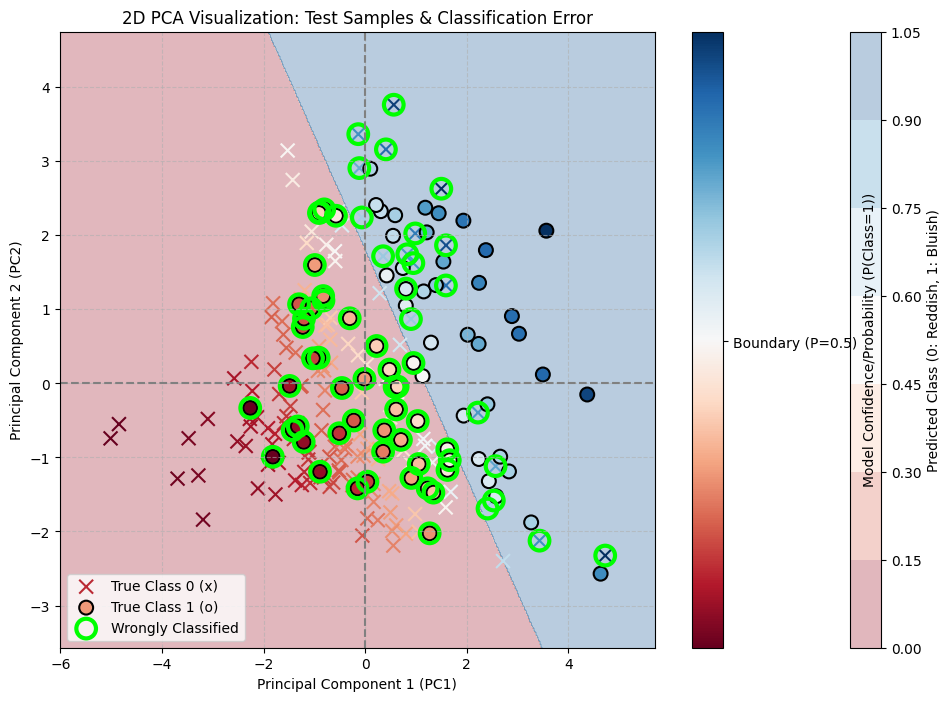

In [25]:
#Combine PCA components and true labels for visualization
pca_df_test = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])
pca_df_test['True_Outcome'] = y_test.values
pca_df_test['Predicted_Outcome'] = y_pred_pca
pca_df_test['Probability_Class_1'] = y_prob_pca
pca_df_test['Is_Correct'] = (pca_df_test['True_Outcome'] == pca_df_test['Predicted_Outcome'])
plt.figure(figsize=(12, 8))
h = .02  # step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point on the grid
Z = lr_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour, where the decision boundary is Z=0.5
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
plt.colorbar(label='Predicted Class (0: Reddish, 1: Bluish)')

#Plot the Test Samples with Symbol and Color Coding
markers = {0: "x", 1: "o"}
for true_class in [0, 1]:
    subset = pca_df_test[pca_df_test['True_Outcome'] == true_class]
    scatter = plt.scatter(subset['PC1'], subset['PC2'],
                          c=subset['Probability_Class_1'],
                          cmap='RdBu',
                          s=100,
                          marker=markers[true_class],
                          edgecolor='k',
                          linewidths=1.5,
                          label=f'True Class {true_class} ({markers[true_class]})')

cbar = plt.colorbar(scatter, ticks=[0, 0.5, 1], label='Model Confidence/Probability (P(Class=1))')
cbar.set_ticklabels(['High Confidence in Class 0', 'Boundary (P=0.5)', 'High Confidence in Class 1'])

#Highlight Wrongly Classified Points (Summary Visualization)
wrongly_classified = pca_df_test[~pca_df_test['Is_Correct']]
plt.scatter(wrongly_classified['PC1'], wrongly_classified['PC2'],
            s=200, facecolors='none', edgecolors='lime',
            linewidths=3, label='Wrongly Classified') # Increased size and bright edge to highlight

plt.title('2D PCA Visualization: Test Samples & Classification Error')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

**Error Confidence Display**

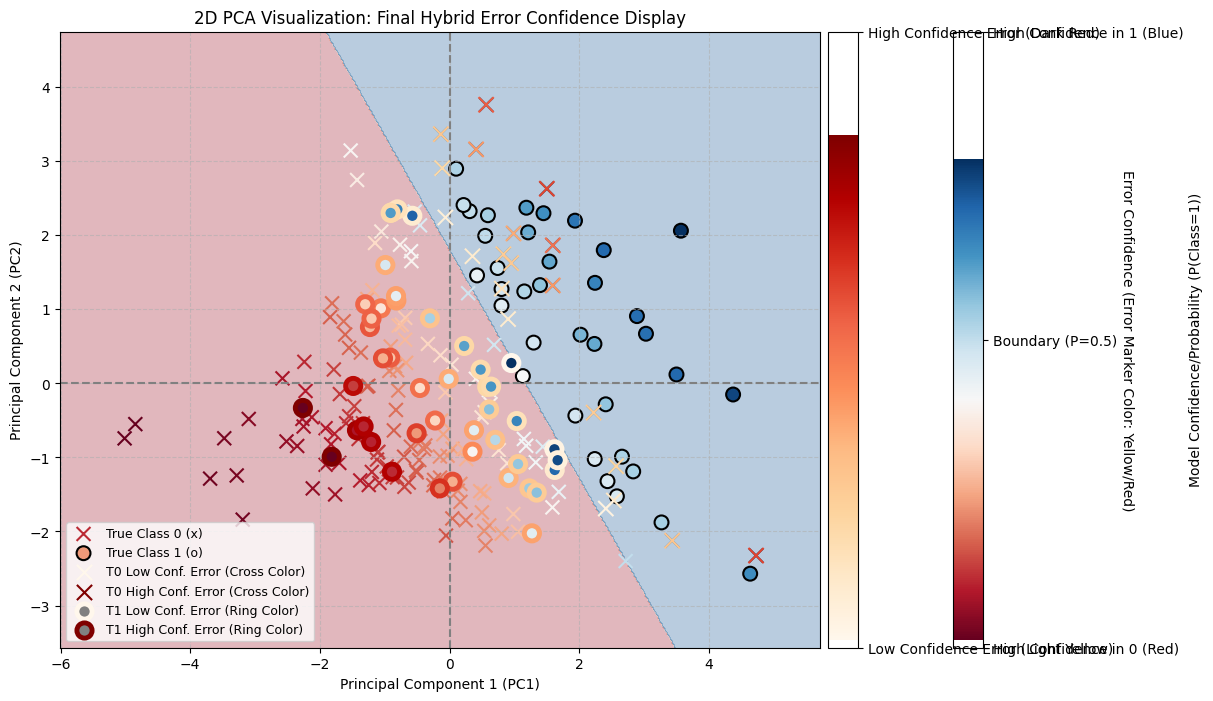

In [26]:
#2D PCA Visualization with HIGH-CONTRAST ERROR MARKER BODIES
pca_df_test['Is_Correct'] = (pca_df_test['True_Outcome'] == pca_df_test['Predicted_Outcome'])
wrongly_classified = pca_df_test[~pca_df_test['Is_Correct']].copy()

# Calculate Error Confidence (0.5 to 1.0)
wrongly_classified['Error_Confidence'] = np.where(
    wrongly_classified['True_Outcome'] == 0,
    wrongly_classified['Probability_Class_1'],
    1 - wrongly_classified['Probability_Class_1']
)

# Set up the color map for the ERROR COLOR (Yellow to Dark Red)
error_cmap = plt.cm.get_cmap('OrRd', 256)
# Normalize the Error_Confidence data (0.5 to 1.0)
norm = plt.Normalize(wrongly_classified['Error_Confidence'].min(), wrongly_classified['Error_Confidence'].max())
markers = {0: "x", 1: "o"}
s_correct = 100
s_error = 120

plt.figure(figsize=(12, 8))
h = .02
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lr_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)
scatter_main_handles = []

for true_class in [0, 1]:
    subset = pca_df_test[pca_df_test['True_Outcome'] == true_class]

    handle = plt.scatter(subset['PC1'], subset['PC2'],
                         c=subset['Probability_Class_1'],
                         cmap='RdBu',
                         s=s_correct,
                         marker=markers[true_class],
                         edgecolor='k',
                         linewidths=1.5,
                         label=f'True Class {true_class} ({markers[true_class]})')
    scatter_main_handles.append(handle)

#OVERWRITE Error Samples with Error Confidence Color Mapping
for true_class in [0, 1]:
    error_subset = wrongly_classified[wrongly_classified['True_Outcome'] == true_class]

    if not error_subset.empty:
        error_colors_subset = error_cmap(norm(error_subset['Error_Confidence']))

        if true_class == 1: # Circles ('o') -> Use the working RING method
            plt.scatter(error_subset['PC1'], error_subset['PC2'],
                        c=error_subset['Probability_Class_1'], # Interior color (P(1))
                        cmap='RdBu',
                        s=s_error,
                        marker=markers[true_class],
                        edgecolors=error_colors_subset,        # Dynamic Red/Yellow Ring
                        linewidths=3.5,
                        zorder=10)
        else: # Crosses ('x') -> Use the marker FACE color for the error highlight
            plt.scatter(error_subset['PC1'], error_subset['PC2'],
                        facecolors=error_colors_subset,        # <--- FACE COLOR IS THE ERROR HIGHLIGHT
                        edgecolors='k',                        # Keep the edge black for distinction
                        s=s_error,
                        marker=markers[true_class],
                        linewidths=1.5,
                        zorder=11) # Ensure crosses are on top!

legend_handles = scatter_main_handles + [
    # Low Confidence Error (Pale Yellow Cross)
    plt.scatter([], [], marker='x', s=s_error, facecolors=error_cmap(norm(0.5)), edgecolors='k', linewidths=1.5),
    # High Confidence Error (Dark Red Cross)
    plt.scatter([], [], marker='x', s=s_error, facecolors=error_cmap(norm(1.0)), edgecolors='k', linewidths=1.5),
    # Low Confidence Error (Pale Yellow Ring)
    plt.scatter([], [], marker='o', s=s_error, facecolors='gray', edgecolors=error_cmap(norm(0.5)), linewidths=3.5),
    # High Confidence Error (Dark Red Ring)
    plt.scatter([], [], marker='o', s=s_error, facecolors='gray', edgecolors=error_cmap(norm(1.0)), linewidths=3.5)
]

legend_labels = ['True Class 0 (x)', 'True Class 1 (o)'] + [
    'T0 Low Conf. Error (Cross Color)',
    'T0 High Conf. Error (Cross Color)',
    'T1 Low Conf. Error (Ring Color)',
    'T1 High Conf. Error (Ring Color)'
]
plt.legend(legend_handles, legend_labels, loc='lower left', fontsize=9)

cbar_main = plt.colorbar(scatter_main_handles[0], ax=plt.gca(), orientation='vertical', pad=0.1, fraction=0.04)
cbar_main.set_label('Model Confidence/Probability (P(Class=1))')
cbar_main.set_ticks([0, 0.5, 1])
cbar_main.set_ticklabels(['High Confidence in 0 (Red)', 'Boundary (P=0.5)', 'High Confidence in 1 (Blue)'])

cbar_error = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=error_cmap),
                         ax=plt.gca(), orientation='vertical', pad=0.01, fraction=0.04)
cbar_error.set_label('Error Confidence (Error Marker Color: Yellow/Red)', rotation=270, labelpad=15)
cbar_error.set_ticks([0.5, 1.0])
cbar_error.set_ticklabels(['Low Confidence Error (Light Yellow)', 'High Confidence Error (Dark Red)'])


plt.title('2D PCA Visualization: Final Hybrid Error Confidence Display')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()